In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parámetros
hjd0 = 2460000.0
period = 0.617861  # cámbialo por tu valor

# cargar datos
star_id = '265'

star_lc_V_path = f'NGC6426/lcs/V_full/lc{star_id}_V.data'
star_lc_I_path = f'NGC6426/lcs/I_full/lc{star_id}_I.data'

star_lc_V = np.loadtxt(star_lc_V_path, unpack=True)
star_lc_I = np.loadtxt(star_lc_I_path, unpack=True)

OSError: NGC6426/lcs/V_full/lc265_V.data not found.

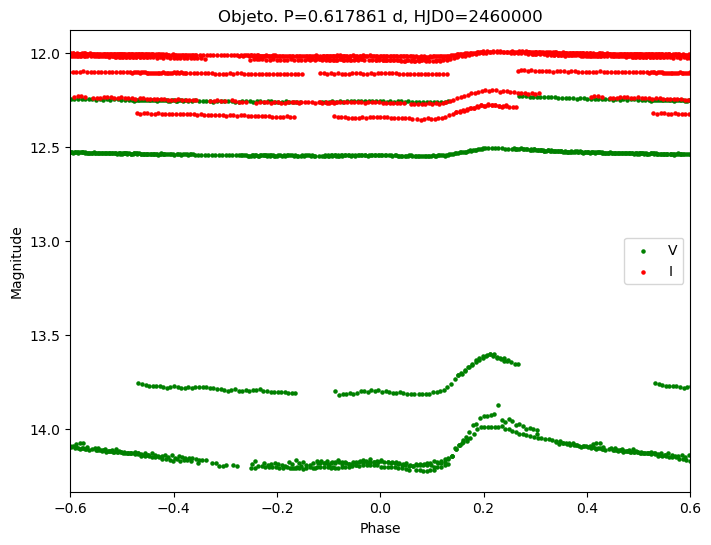

In [ ]:
from lightcurve_plots import raul_plot

raul_plot(star_lc_V_path, star_lc_I_path, 
          period, 2460000)

In [30]:
from to_magnitudes import get_physical_by_id, get_m_ref, isis_flux_to_mag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
todas = !awk '{print $1}' NGC6426/coordinates_NGC6426.dat
print(len(todas))

todas[:5]

1373


['6', '7', '8', '9', '10']

In [32]:
sets = !ls NGC6426_* -d
sets

['NGC6426_2407_I',
 'NGC6426_2407_V',
 'NGC6426_2505_I',
 'NGC6426_2505_V',
 'NGC6426_2506A_I',
 'NGC6426_2506A_V',
 'NGC6426_2506B_I',
 'NGC6426_2506B_V',
 'NGC6426_2508_I',
 'NGC6426_2508_V']

### 🐛 Debug del `flux_to_magnitudes` en `to_magnitudes_todas.ipynb`

In [33]:
import pandas as pd

#star_id = '265'
star_id = '22'

set = 'NGC6426_2407_I'
set_id = set[8:] 
reference_fit = f'{set}/ref.fits'
star_lc = f'{set}/lcs/lc{star_id}.data'
star_lc_full = f'NGC6426/lcs/V_full/lc{star_id}_V.data'
physical_coords_file = f'{set}/phot_{set_id}.data'


df = pd.read_csv(star_lc, delim_whitespace=True, header=None)

df.head()

,0,1,2,3,4,5
0,2.460509e+06,-303.0101,187.4480,-354.2788,187.5841,0.1649
1,2.460509e+06,77.2140,257.2698,46.9880,257.3453,0.0280
2,2.460509e+06,-260.0310,212.5161,-278.0847,212.6301,0.2522
3,2.460509e+06,-345.1994,198.8616,-362.5151,198.9643,0.2897
4,2.460509e+06,-241.4859,184.3870,-264.5965,184.5379,0.2278


In [34]:
delta_flux = df[1].to_numpy(dtype=float)
delta_flux[:10]

array([-303.0101,   77.214 , -260.031 , -345.1994, -241.4859, -128.7906,
        -24.5687,  -83.0575,  -46.208 , -193.3632])

In [35]:
x_physical, y_physical = get_physical_by_id(physical_coords_file, star_id)

print(x_physical, y_physical)

181.227068 63.44491


que hace `get_m_ref`

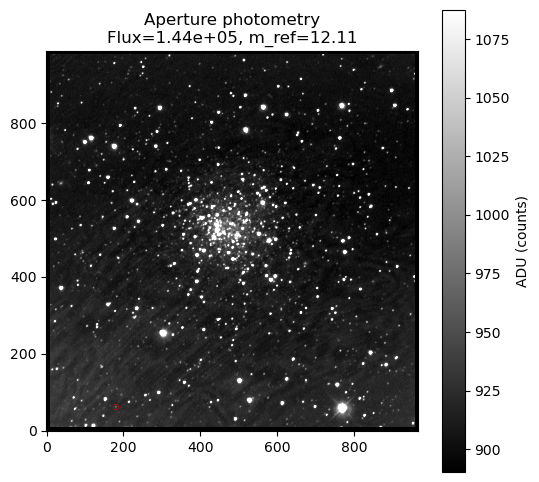

magnitud instrumental de la estrella en ref.fits:
 12.107699055380433 
flujo de la estrella en ref.fits
 143522.62794658958


In [36]:
m_ref, flux_ref = get_m_ref(reference_fit, x_physical, y_physical, 
                            aperture_radius=7.0, display=True)

In [37]:
mag_instr = isis_flux_to_mag(delta_flux, m_ref, C0=25)

mag_instr

array([12.10540923, 12.10828333, 12.10573372, 12.10509079, 12.10587377,
       12.1067252 , 12.10751321, 12.10707091, 12.10734955, 12.10623726,
       12.10518398, 12.10750648, 12.10898771, 12.10843622, 12.10837956,
       12.11019802, 12.10827816, 12.10907893, 12.11062916, 12.10858161,
       12.10876861, 12.1088292 , 12.10877679, 12.11110186, 12.10944664,
       12.10850951, 12.10964006, 12.10868643, 12.10847078, 12.1088325 ,
       12.10801011, 12.10798631, 12.10853796, 12.1089862 , 12.10813555,
       12.10966328, 12.10882044, 12.10911745, 12.10756977, 12.10772772,
       12.10721414, 12.10864684, 12.10776597, 12.10826025, 12.10719593,
       12.10914453, 12.10932561, 12.10829367, 12.10960007, 12.10971807,
       12.1095059 , 12.11032276, 12.10763108, 12.10868957, 12.10599595,
       12.10840613, 12.10949624, 12.10873266, 12.10838282, 12.10654775,
       12.10656118, 12.10675959, 12.10792044, 12.10718656, 12.10889412,
       12.10839151, 12.10681238, 12.10944511, 12.10742706, 12.10

probamos construir un `get_m_ref_new` que admita exptimes

In [38]:
ref_list = pd.read_csv('NGC6426_2407_I/ref_list', delim_whitespace=True, header=None)
hjd_bjd_exptime = pd.read_csv('NGC6426_2407_I/hjd_bjd_exptime', delim_whitespace=True, header=None)

display('ref_list:', ref_list.head())
display('hjd_bjd_exptime:', hjd_bjd_exptime.head())

'ref_list:'

,0,1,2,3,4
0,2024071800625o.fit,3.00002,29.59324,1.215295,901.2708
1,2024071900944o.fit,3.02309,34.70749,1.158990,1120.2800
2,2024071800629o.fit,3.06925,29.71602,1.243233,905.0655
3,2024071700185o.fit,3.13848,23.57130,1.420709,567.1414
4,2024071700181o.fit,3.18463,23.98400,1.367182,590.2135


'hjd_bjd_exptime:'

,0,1,2,3,4
0,2024071700099o.fit,I,2.460509e+06,2.460509e+06,60.0
1,2024071700101o.fit,I,2.460509e+06,2.460509e+06,120.0
2,2024071700103o.fit,I,2.460509e+06,2.460509e+06,120.0
3,2024071700105o.fit,I,2.460509e+06,2.460509e+06,120.0
4,2024071700107o.fit,I,2.460509e+06,2.460509e+06,120.0


In [39]:
# asumiendo que la primera columna es la 0
ref_metadata = hjd_bjd_exptime[hjd_bjd_exptime[0].isin(ref_list[0])]

ref_metadata

,0,1,2,3,4
41,2024071700181o.fit,I,2.460509e+06,2.460509e+06,120.0
43,2024071700185o.fit,I,2.460509e+06,2.460509e+06,120.0
75,2024071800607o.fit,I,2.460510e+06,2.460510e+06,120.0
77,2024071800611o.fit,I,2.460510e+06,2.460510e+06,120.0
84,2024071800625o.fit,I,2.460510e+06,2.460510e+06,120.0
86,2024071800629o.fit,I,2.460510e+06,2.460510e+06,120.0
109,2024071900940o.fit,I,2.460511e+06,2.460511e+06,120.0
110,2024071900942o.fit,I,2.460511e+06,2.460511e+06,120.0
111,2024071900944o.fit,I,2.460511e+06,2.460511e+06,120.0
120,2024071900962o.fit,I,2.460511e+06,2.460511e+06,120.0


In [40]:
ref_exptime = np.sum(ref_metadata[4])

ref_exptime

1200.0

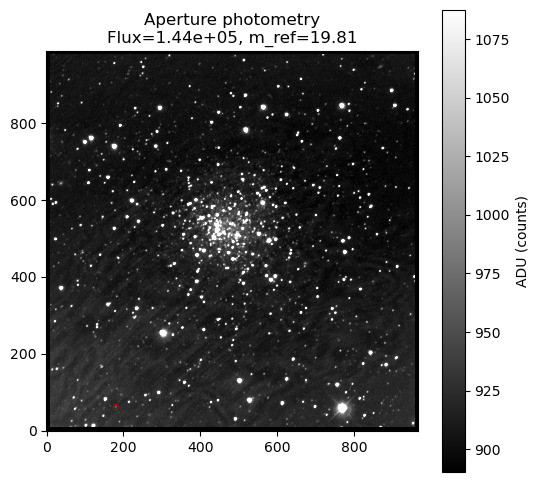

magnitud instrumental de la estrella en ref.fits:
 19.805652170499496 
flujo de la estrella en ref.fits
 143522.62794658958


In [41]:
from to_magnitudes import get_m_ref_new

m_ref, flux_ref = get_m_ref_new(reference_fit, x_physical, y_physical, 
                                aperture_radius=7.0, exptime=ref_exptime, display=True)

### ahora integrar el exptime al `isis_flux_to_mag`
creo que le pasaremos un array de exptimes

In [42]:
df

,0,1,2,3,4,5
0,2.460509e+06,-303.0101,187.4480,-354.2788,187.5841,0.1649
1,2.460509e+06,77.2140,257.2698,46.9880,257.3453,0.0280
2,2.460509e+06,-260.0310,212.5161,-278.0847,212.6301,0.2522
3,2.460509e+06,-345.1994,198.8616,-362.5151,198.9643,0.2897
4,2.460509e+06,-241.4859,184.3870,-264.5965,184.5379,0.2278
...,...,...,...,...,...,...
131,2.460511e+06,-255.0958,248.4641,-270.4237,248.5645,0.2134
132,2.460511e+06,-305.8821,257.8954,-313.1030,257.9636,0.2835
133,2.460511e+06,-35.1774,275.4940,-48.0889,275.5584,0.0384
134,2.460511e+06,-154.7373,249.0600,-168.4902,249.1562,0.1381


In [43]:
hjd_bjd_exptime

,0,1,2,3,4
0,2024071700099o.fit,I,2.460509e+06,2.460509e+06,60.0
1,2024071700101o.fit,I,2.460509e+06,2.460509e+06,120.0
2,2024071700103o.fit,I,2.460509e+06,2.460509e+06,120.0
3,2024071700105o.fit,I,2.460509e+06,2.460509e+06,120.0
4,2024071700107o.fit,I,2.460509e+06,2.460509e+06,120.0
...,...,...,...,...,...
131,2024071900984o.fit,I,2.460511e+06,2.460511e+06,120.0
132,2024071900986o.fit,I,2.460511e+06,2.460511e+06,120.0
133,2024071900988o.fit,I,2.460511e+06,2.460511e+06,120.0
134,2024071900990o.fit,I,2.460511e+06,2.460511e+06,120.0


In [44]:
hjd_bjd_exptime[2]

0      2.460509e+06
1      2.460509e+06
2      2.460509e+06
3      2.460509e+06
4      2.460509e+06
           ...     
131    2.460511e+06
132    2.460511e+06
133    2.460511e+06
134    2.460511e+06
135    2.460511e+06
Name: 2, Length: 136, dtype: float64

In [45]:
# renombramos para claridad
df = df.rename(columns={0: "hjd"})
hjd_bjd_exptime = hjd_bjd_exptime.rename(columns={0: "file", 2: "hjd", 3: "bjd", 4: "exptime"})

# merge SOLO para agregar 'file'
df = pd.merge_asof(
    df, 
    hjd_bjd_exptime[["file", "hjd", "exptime", "bjd"]],
    on="hjd",
    direction="nearest",
    tolerance=1e-6   # aquí ajustas según el error máximo permitido
).set_index("file")

df = df.rename(columns={"hjd": 0})


In [46]:
df

,0,1,2,3,4,5,exptime,bjd
file,,,,,,,,
2024071700099o.fit,2.460509e+06,-303.0101,187.4480,-354.2788,187.5841,0.1649,60.0,2.460509e+06
2024071700101o.fit,2.460509e+06,77.2140,257.2698,46.9880,257.3453,0.0280,120.0,2.460509e+06
2024071700103o.fit,2.460509e+06,-260.0310,212.5161,-278.0847,212.6301,0.2522,120.0,2.460509e+06
2024071700105o.fit,2.460509e+06,-345.1994,198.8616,-362.5151,198.9643,0.2897,120.0,2.460509e+06
2024071700107o.fit,2.460509e+06,-241.4859,184.3870,-264.5965,184.5379,0.2278,120.0,2.460509e+06
...,...,...,...,...,...,...,...,...
2024071900984o.fit,2.460511e+06,-255.0958,248.4641,-270.4237,248.5645,0.2134,120.0,2.460511e+06
2024071900986o.fit,2.460511e+06,-305.8821,257.8954,-313.1030,257.9636,0.2835,120.0,2.460511e+06
2024071900988o.fit,2.460511e+06,-35.1774,275.4940,-48.0889,275.5584,0.0384,120.0,2.460511e+06


In [47]:
from to_magnitudes import isis_flux_to_mag_new

isis_flux_to_mag_new(df[1], m_ref, df['exptime'])

file
2024071700099o.fit    22.206138
2024071700101o.fit    23.675914
2024071700103o.fit    23.019727
2024071700105o.fit    22.901980
2024071700107o.fit    23.047152
                        ...    
2024071900984o.fit    23.026958
2024071900986o.fit    22.954756
2024071900988o.fit    23.410741
2024071900990o.fit    23.185523
2024071900992o.fit    23.456785
Length: 136, dtype: float64

In [48]:
df['exptime'].to_numpy()

array([ 60., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 120.])

In [49]:
C0=25

# Paso 1: Calcular F_{*,ref} usando m_ref
F_ref = 10**((C0 - m_ref) / 2.5)

F_ref


119.60218995549117

In [50]:
# max: offset para evitar negativos 
offset = abs(delta_flux.min()) + 10
#offset =0
# Paso 2: Calcular flujos absolutos: F_{*,i} = F_ref - ΔF_{*,i}
absolute_flux = F_ref - delta_flux + offset

absolute_flux

array([786.49498996, 406.27088996, 743.51588996, 828.68428996,
       724.97078996, 612.27548996, 508.05358996, 566.54238996,
       529.69288996, 676.84808996, 816.33588996, 508.94358996,
       313.23978996, 386.07308996, 393.55728996, 153.52888996,
       406.95358996, 301.19628996,  96.67838996, 366.86788996,
       342.17068996, 334.16998996, 341.09028996,  34.37508996,
       252.65848996, 376.39098996, 227.13468996, 353.02448996,
       381.50718996, 333.73428996, 442.37248996, 445.51858996,
       372.63368996, 313.43858996, 425.79688996, 224.06988996,
       335.32588996, 296.11108996, 500.57578996, 479.69608996,
       547.60018996, 358.25278996, 474.63928996, 409.32038996,
       550.00828996, 292.53548996, 268.63318996, 404.90468996,
       232.41068996, 216.84098996, 244.83778996, 137.07828996,
       492.47018996, 352.60888996, 708.79408996, 390.04758996,
       246.11308996, 346.91908996, 393.12708996, 635.75528996,
       633.97818996, 607.72528996, 454.22338996, 551.24

In [51]:
len(absolute_flux)

136

In [52]:
# Paso 3: Convertir a magnitudes instrumentales
#mag_instr = -2.5 * np.log10(absolute_flux) + C0
mag_instr = C0 - 2.5 * np.log10(absolute_flux) + 2.5*np.log10(df['exptime'].to_numpy())

In [53]:
mag_instr

array([22.20613822, 23.67591385, 23.01972748, 22.90198035, 23.04715184,
       23.23058593, 23.4331793 , 23.31487209, 23.38789276, 23.1217251 ,
       22.91828089, 23.43127899, 23.9582608 , 23.73127929, 23.71043321,
       24.73247784, 23.67409091, 24.00082907, 25.23462959, 23.78667886,
       23.8623461 , 23.8880345 , 23.86577972, 26.35734351, 24.19161837,
       23.75885507, 24.30724444, 23.82844103, 23.7441963 , 23.88945104,
       23.58348284, 23.57578854, 23.76974782, 23.95757195, 23.6249469 ,
       24.32199436, 23.8842854 , 24.01931643, 23.44927851, 23.49553767,
       23.35179414, 23.81247916, 23.5070439 , 23.66779467, 23.34703003,
       24.03250671, 24.12505394, 23.6795711 , 24.28231287, 24.35759966,
       24.22575699, 24.85553142, 23.46700325, 23.82971997, 23.0716529 ,
       23.72015912, 24.22011633, 23.84738262, 23.71162069, 23.18972816,
       23.19276732, 23.23868484, 23.55477938, 23.34458734, 23.91625016,
       23.71479614, 23.25123477, 24.19074853, 23.40910693, 24.45

In [54]:
pd.DataFrame({'absolute_flux':absolute_flux, 'mag_instr':mag_instr})

,absolute_flux,mag_instr
0,786.49499,22.206138
1,406.27089,23.675914
2,743.51589,23.019727
3,828.68429,22.901980
4,724.97079,23.047152
...,...,...
131,738.58069,23.026958
132,789.36699,22.954756
133,518.66229,23.410741
134,638.22219,23.185523
